In [1]:
from prophet import Prophet
import pandas as pd
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('numexpr').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. This time series of the number of air passengers is an example of when additive seasonality does not work:

Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       401.676    0.00248047       124.072           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       401.794   6.53748e-05       58.9607   1.051e-06       0.001      209  LS failed, Hessian reset 
     199       401.842   7.96656e-05       76.5629           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       401.847   9.58429e-06       62.8741   1.173e-07       0.001      341  LS failed, Hessian reset 
     299       401.875   0.000423503       97.4976           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       401.939   0.000255806       95.7883   2.552e-06       0.001      496  LS failed, Hessian rese

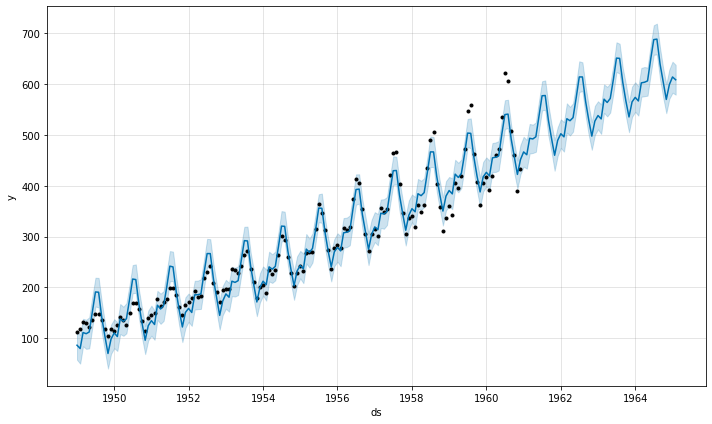

In [2]:
df = pd.read_csv('../examples/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

Prophet can model multiplicative seasonality by setting `seasonality_mode='multiplicative'` in the input arguments:

Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.164    0.00404329       133.096      0.7795      0.7795      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.029    0.00011625       61.0812      0.7463      0.7463      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.241   0.000197464       74.1894      0.6815      0.6815      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       503.429   0.000269211       170.518   3.444e-06       0.001      512  LS failed, Hessian reset 
     399       503.521    0.00012352       74.8921      0.4361      0.4361      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428       503.524   4.87946e-06    

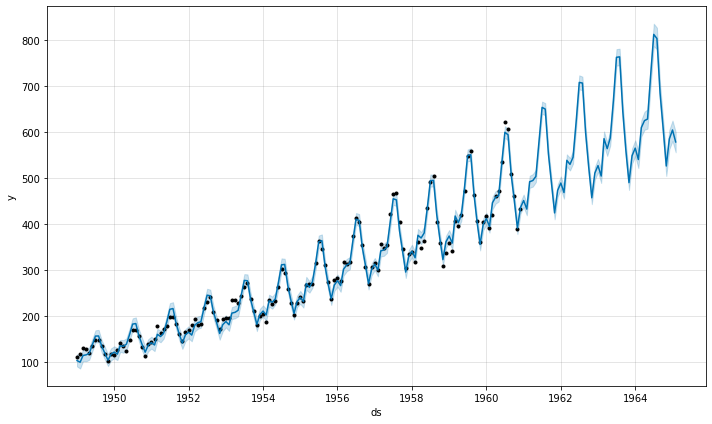

In [3]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

The components figure will now show the seasonality as a percent of the trend:

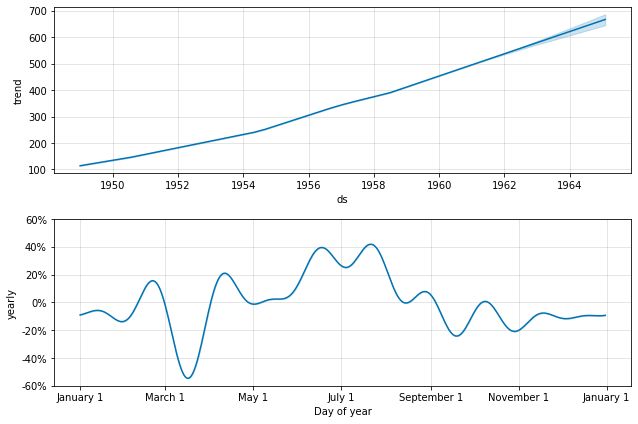

In [4]:
fig = m.plot_components(forecast)

With `seasonality_mode='multiplicative'`, holiday effects will also be modeled as multiplicative. Any added seasonalities or extra regressors will by default use whatever `seasonality_mode` is set to, but can be overriden by specifying `mode='additive'` or `mode='multiplicative'` as an argument when adding the seasonality or regressor.

For example, this block sets the built-in seasonalities to multiplicative, but includes an additive quarterly seasonality and an additive regressor:

In [5]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')

Additive and multiplicative extra regressors will show up in separate panels on the components plot. Note, however, that it is pretty unlikely to have a mix of additive and multiplicative seasonalities, so this will generally only be used if there is a reason to expect that to be the case.